In [1]:
import pandas as pd
import numpy as np 

import os

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
import time 

import matplotlib.pyplot as plt
from glob import glob

In [2]:
input_dir = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D'

In [3]:
categories=["Astrocytoma","Glioblastoma","Gliomas","Meningioma","Neurocytoma"]

In [4]:
import shutil

def split_train_val_test(input_dir, categories, train_ratio=0.7, val_ratio=0.15, seed=42):
    np.random.seed(seed)
    
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)
        
        # Eğitim, doğrulama ve test setleri için sınırlar belirle
        total_count = len(images)
        train_count = int(train_ratio * total_count)
        val_count = int(val_ratio * total_count)
        
        # Eğitim, doğrulama ve test setlerini oluştur
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]
        
        train_dir = os.path.join(input_dir, 'train', category)
        val_dir = os.path.join(input_dir, 'val', category)
        test_dir = os.path.join(input_dir, 'test', category)
        
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        
        # Görselleri train dizinine taşı
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(train_dir, img))
        
        # Görselleri validation dizinine taşı
        for img in val_images:
            shutil.move(os.path.join(category_path, img), os.path.join(val_dir, img))
        
        # Görselleri test dizinine taşı
        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(test_dir, img))
        
        # Orijinal kategori dizini boşsa, sil
        if not os.listdir(category_path):
            os.rmdir(category_path)

In [5]:
split_train_val_test(input_dir, categories) 

In [5]:
train_path = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\train'
test_path = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\test'
val_path = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\val'

<function matplotlib.pyplot.show(close=None, block=None)>

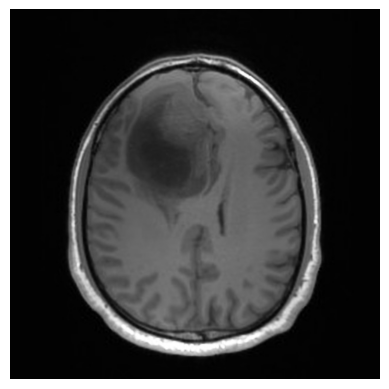

In [6]:
img=load_img(train_path + r"\Astrocytoma\Astrocytoma_T1_000.tif" )

plt.imshow(img)
plt.axis("off")
plt.show

In [7]:
x=img_to_array(img)
x.shape

(630, 630, 3)

In [8]:
className=glob(train_path + r"\*") ##glob train içindeki tüm dosyaları çekti
numberOfClass = len(className)
numberOfClass

5

In [9]:
className

['C:\\Users\\90541\\Desktop\\Yapay Zeka\\Udemy Yapay Zeka\\İleri Seviye Deep Learning DataAI\\1) CNN Review\\BrainTumor2DProjesi\\braintumor2d\\Brain Tumor Classification 2D\\Brain Tumor Classification 2D\\train\\Astrocytoma',
 'C:\\Users\\90541\\Desktop\\Yapay Zeka\\Udemy Yapay Zeka\\İleri Seviye Deep Learning DataAI\\1) CNN Review\\BrainTumor2DProjesi\\braintumor2d\\Brain Tumor Classification 2D\\Brain Tumor Classification 2D\\train\\Glioblastoma',
 'C:\\Users\\90541\\Desktop\\Yapay Zeka\\Udemy Yapay Zeka\\İleri Seviye Deep Learning DataAI\\1) CNN Review\\BrainTumor2DProjesi\\braintumor2d\\Brain Tumor Classification 2D\\Brain Tumor Classification 2D\\train\\Gliomas',
 'C:\\Users\\90541\\Desktop\\Yapay Zeka\\Udemy Yapay Zeka\\İleri Seviye Deep Learning DataAI\\1) CNN Review\\BrainTumor2DProjesi\\braintumor2d\\Brain Tumor Classification 2D\\Brain Tumor Classification 2D\\train\\Meningioma',
 'C:\\Users\\90541\\Desktop\\Yapay Zeka\\Udemy Yapay Zeka\\İleri Seviye Deep Learning DataAI\\1)

In [10]:
datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(200,200), 
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical"
) 

test_generator=datagen.flow_from_directory(
    test_path,
    target_size=(200,200), 
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical"
) 

val_generator=datagen.flow_from_directory(
    val_path,
    target_size=(200,200), 
    batch_size=32,
    color_mode="rgb", 
    class_mode="categorical"
)

Found 4767 images belonging to 5 classes.
Found 1027 images belonging to 5 classes.
Found 1020 images belonging to 5 classes.


In [12]:
model = Sequential()

model.add(Conv2D(16,(5,5),input_shape=(200,200,3))) #en düşük görsel 240 pxti
model.add(Activation("relu"))
model.add(MaxPooling2D()) #default olarak (2,2) gelir

model.add(Conv2D(16,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("swish"))
model.add(Dense(64))
model.add(Activation("swish"))
model.add(Dense(5)) #numberofclass
model.add(Activation("softmax"))

In [13]:
from keras.optimizers import Adam

optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
start_time = time.time()

hist=model.fit_generator(
    generator=train_generator,
    epochs=10,
    validation_data=val_generator,
)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time / 60:.2f} minutes")

Epoch 1/10
149/149 [==============================] - 27s 178ms/step - loss: 0.5088 - accuracy: 0.8041 - val_loss: 0.8884 - val_accuracy: 0.7343
Epoch 2/10
149/149 [==============================] - 26s 171ms/step - loss: 0.1580 - accuracy: 0.9413 - val_loss: 0.7616 - val_accuracy: 0.8088
Epoch 3/10
149/149 [==============================] - 25s 165ms/step - loss: 0.0831 - accuracy: 0.9729 - val_loss: 0.9310 - val_accuracy: 0.7922
Epoch 4/10
149/149 [==============================] - 27s 183ms/step - loss: 0.0434 - accuracy: 0.9843 - val_loss: 1.0649 - val_accuracy: 0.8176
Epoch 5/10
149/149 [==============================] - 26s 173ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 1.4060 - val_accuracy: 0.7755
Epoch 6/10
149/149 [==============================] - 26s 175ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 1.3306 - val_accuracy: 0.7902
Epoch 7/10
149/149 [==============================] - 26s 172ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 1.5719 - val_ac

In [15]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f'Test accuracy: {test_acc}')

33/33 [==============================] - 3s 80ms/step - loss: 1.5892 - accuracy: 0.8072
Test accuracy: 0.8072054386138916
